In [1]:
import matplotlib.pyplot as plt
from sympy import *
from sympy.plotting import plot
from sympy.printing.latex import LatexPrinter
from sympy.core.function import _coeff_isneg, AppliedUndef, Derivative
from sympy.printing.precedence import precedence, PRECEDENCE
from spb import *
from scipy.integrate import quad
import numpy as np
import pandas as pd

In [2]:
class CustomPrint(LatexPrinter):
    def _print_Derivative(self, expr):
        diff_symbol = r'\partial'

        
        tex = "" 
        dim = 0
        for x, num in reversed(expr.variable_count):
            dim += num
            if num == 1:
                tex += r"%s %s" % (diff_symbol, self._print(x))
            else:
                tex += r"%s %s^{%s}" % (diff_symbol,
                                        self.parenthesize_super(self._print(x)),
                                        self._print(num))

        if dim == 1:
            tex = r"\frac{%s}{%s}" % (diff_symbol, tex) 
        else:
            tex = r"\frac{%s^{%s}}{%s}" % (diff_symbol, self._print(dim), tex) 

        if any(_coeff_isneg(i) for i in expr.args):
            return r"%s %s" % (tex, self.parenthesize(expr.expr,
                                                  PRECEDENCE["Mul"],
                                                  is_neg=True,
                                                  strict=True))

        return r"%s %s" % (tex, self.parenthesize(expr.expr,
                                                  PRECEDENCE["Mul"],
                                                  is_neg=False,
                                                  strict=True))
        
def custom_print_func(expr, **settings):
    return CustomPrint().doprint(expr)

In [3]:
init_printing(use_latex=True,latex_mode="plain",latex_printer=custom_print_func)
plt.rcParams['figure.figsize'] = 10, 8

In [4]:
q,L,k,khat,c,vc,ac,mc,avc,afc,fc,mpl,mpk,λ,l,mrt,pk,pl,qp = symbols('q L k \overline{k} c vc ac mc avc afc fc mpl mpk λ l mrt pk pl qp')

###### Production function

In [5]:
q = Function('q')(L,k)
Eq(q,sqrt(L*k))
# Where L = labor, k = capital and q = quantity produced

###### Short run production

In [6]:
Eq(q,sqrt(L*khat))
# Where L = labor, 𝑘 = capital (fixed, so it becomes a constant) and q = quantity produced (production level)

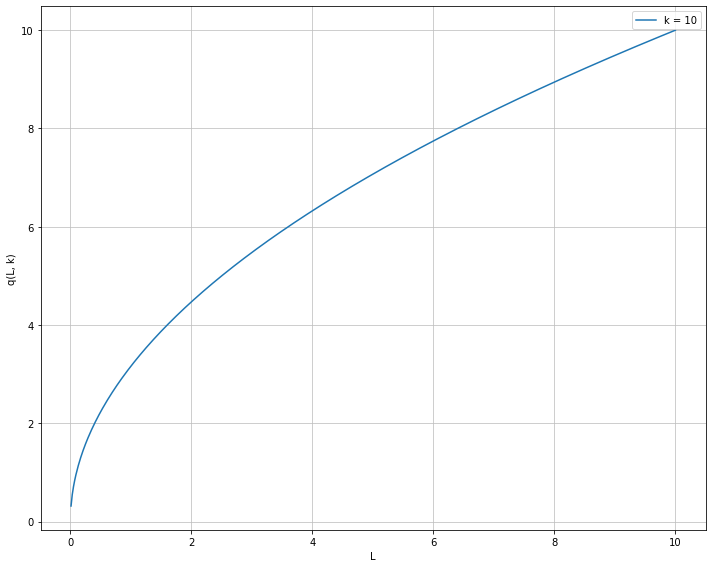

In [7]:
khat_ex = 10
p1 = plot(sqrt(L*khat_ex), ylabel=q, xlabel='L',label = f'k = {khat_ex}',legend=True ,show=False)
p1.show()

In [8]:
# When labor increases, production also does, shown by
Derivative(q,L)>=0

In [9]:
# The slope decreases as labor increases, shown by
Derivative(Derivative(q,L),L)<=0

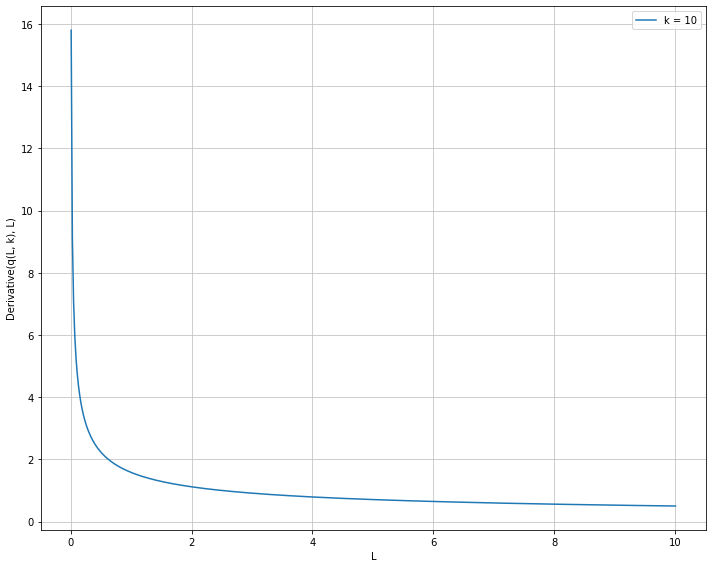

In [10]:
khat_ex = 10
p1 = plot(diff(sqrt(L*khat_ex),L),ylabel=Derivative(q,L),xlabel='L',label = f'k = {khat_ex}',legend=True,show=False)
p1.show()

In [11]:
# This means that when labor increases, it does less good for the production level (Diminishing product of labor)
print("Marginal product of labor (decreasing) = ")
Derivative(q,L)

Marginal product of labor (decreasing) = 


In [12]:
# For example, if the number of machines is fixed and all in use, if we keep adding labor, it wont do much to grow production

###### Total, marginal and average product

In [13]:
# Lets say we only have one unit of capital, and we can choose how much labor to use
labor = np.sort(np.arange(0,10,1))
capital = np.ones(len(labor),dtype=int)
short_term_production = pd.DataFrame(data={'labor':labor,'capital':capital})

In [14]:
# We have a table with each combination of labor and capital
short_term_production

,labor,capital
0,0,1
1,1,1
2,2,1
3,3,1
4,4,1
5,5,1
6,6,1
7,7,1
8,8,1
9,9,1


In [15]:
# Lets assume we already know how much product we can get from each combination,and we dont have a production function
total_products = [0,1,2,4,6,7,8,9,8,7]
short_term_production['total product'] = total_products
short_term_production

,labor,capital,total product
0,0,1,0
1,1,1,1
2,2,1,2
3,3,1,4
4,4,1,6
5,5,1,7
6,6,1,8
7,7,1,9
8,8,1,8
9,9,1,7


In [16]:
# Now we can calculate the average product and marginal product
average_products = []
marginal_products = []
for i in short_term_production.index:
    if i == 0:
        marginal_products.append(0)
        average_products.append(0)
    else:
        marginal_products.append(short_term_production['total product'][i] - short_term_production['total product'][i-1])
        average_products.append(short_term_production['total product'][i]/short_term_production['labor'][i])
short_term_production['marginal product'] = marginal_products
short_term_production['average product'] = average_products
short_term_production

,labor,capital,total product,marginal product,average product
0,0,1,0,0,0.000000
1,1,1,1,1,1.000000
2,2,1,2,1,1.000000
3,3,1,4,2,1.333333
4,4,1,6,2,1.500000
5,5,1,7,1,1.400000
6,6,1,8,1,1.333333
7,7,1,9,1,1.285714
8,8,1,8,-1,1.000000
9,9,1,7,-1,0.777778


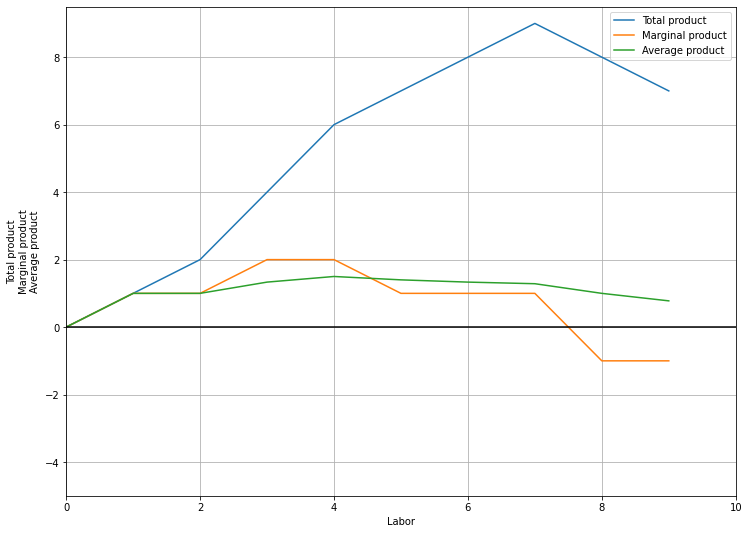

In [17]:
fig,ax = plt.subplots(figsize=(12,9))
ax.plot(short_term_production['labor'],short_term_production['total product'],label='Total product')
ax.plot(short_term_production['labor'],short_term_production['marginal product'],label='Marginal product')
ax.plot(short_term_production['labor'],short_term_production['average product'],label='Average product')
ax.hlines(0,xmin=0,xmax=10,color='black')
plt.xlim(0,10)
plt.ylim(-5)
plt.xlabel('Labor')
plt.ylabel('Total product\nMarginal product\nAverage product')
plt.legend()
plt.grid(True)
plt.show()
# We can see that the maximum total product occurs when marginal product equals 0
# Total product grows when marginal product > 0
# Total product decreases when marginal product < 0
# Average product grows when marginal product > average product
# Average product decreases when marginal product < average product

###### Long run production

In [18]:
Eq(q,sqrt(L*k))
# Where L = labor, 𝑘 = capital and q = quantity produced (production level)

In [19]:
# We can modify the equation and we get
Eq(k,(q**2)/L)
# This new equation gives us each combination of capital and labor, for a specific production level
# This curves are called isoquants

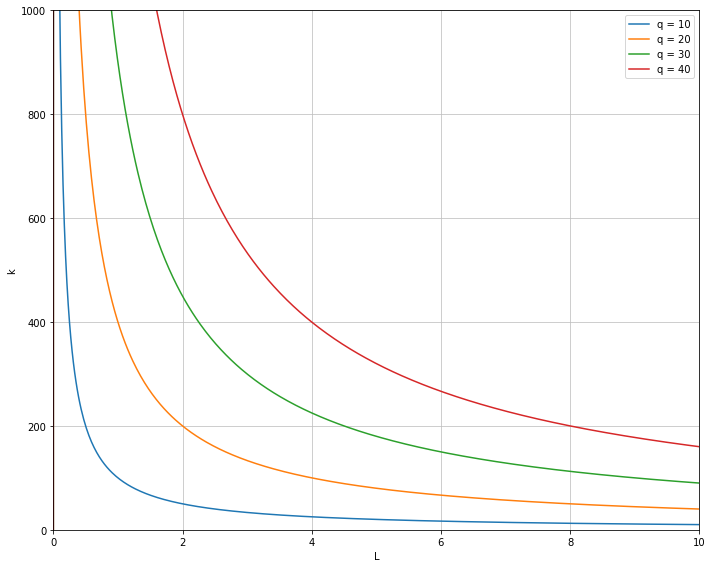

In [20]:
q_ex = 10 # Example production level
p1 = plot((q_ex**2)/L, ylabel='k', xlabel='L',label = f'q = {q_ex}',legend=True,xlim=[0,10],ylim=[0,1000],show=False)
q_ex = 20 # Example production level
p2 = plot((q_ex**2)/L, ylabel='k', xlabel='L',label = f'q = {q_ex}',legend=True,show=False)
q_ex = 30 # Example production level
p3 = plot((q_ex**2)/L, ylabel='k', xlabel='L',label = f'q = {q_ex}',legend=True,show=False)
q_ex = 40 # Example production level
p4 = plot((q_ex**2)/L, ylabel='k', xlabel='L',label = f'q = {q_ex}',legend=True,show=False)
p1.append(p2[0])
p1.append(p3[0])
p1.append(p4[0])
p1.show()

In [21]:
# In this case, we have a Cobb-Douglas production function, where the exponents for each factor are 0.5
# Lets see other types of production functions

In [22]:
# Perfect substitutes
Eq(q,L+k)
# Where L = labor, 𝑘 = capital and q = quantity produced (production level)

In [23]:
# We modify the equation and we get
Eq(k,q-L)

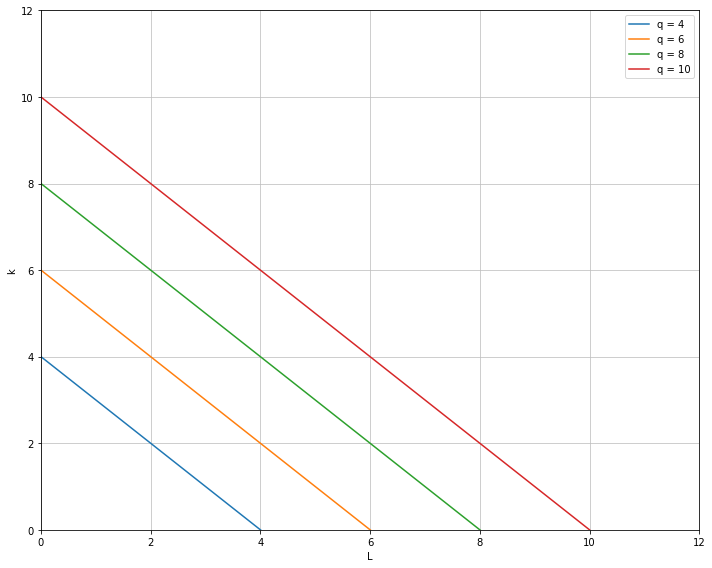

In [24]:
q_ex = 4 # Example production level
p1 = plot(q_ex-L, ylabel='k', xlabel='L',label = f'q = {q_ex}',legend=True,xlim=[0,12],ylim=[0,12],show=False)
q_ex = 6 # Example production level
p2 = plot(q_ex-L, ylabel='k', xlabel='L',label = f'q = {q_ex}',legend=True,show=False)
q_ex = 8 # Example production level
p3 = plot(q_ex-L, ylabel='k', xlabel='L',label = f'q = {q_ex}',legend=True,show=False)
q_ex = 10 # Example production level
p4 = plot(q_ex-L, ylabel='k', xlabel='L',label = f'q = {q_ex}',legend=True,show=False)
p1.append(p2[0])
p1.append(p3[0])
p1.append(p4[0])
p1.show()

In [25]:
# Perfect complementaries
Eq(q,Min(L,k))
# Where L = labor, 𝑘 = capital and q = quantity produced (production level)

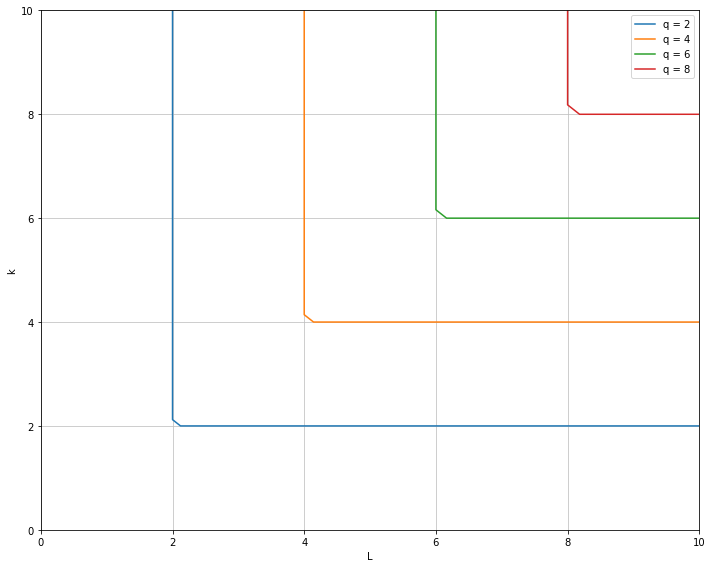

In [26]:
q_ex = 2 # Example production level
p1 = plot_implicit(Eq(q_ex,Min(L,k)), ylabel='k', xlabel='L',label = f'q = {q_ex}',legend=True,xlim=[0,10],ylim=[0,10],show=False)
q_ex = 4 # Example production level
p2 = plot_implicit(Eq(q_ex,Min(L,k)), ylabel='k', xlabel='L',label = f'q = {q_ex}',legend=True,show=False)
q_ex = 6 # Example production level
p3 = plot_implicit(Eq(q_ex,Min(L,k)), ylabel='k', xlabel='L',label = f'q = {q_ex}',legend=True,show=False)
q_ex = 8 # Example production level
p4 = plot_implicit(Eq(q_ex,Min(L,k)), ylabel='k', xlabel='L',label = f'q = {q_ex}',legend=True,show=False)
p1.append(p2[0])
p1.append(p3[0])
p1.append(p4[0])
p1.show()

###### Short term costs

In [27]:
# Lets say the producer has the following costs function
Eq(c,2*L+3*k)
# Where L = labor, 𝑘 = capital and c = cost

In [28]:
# Given we are in the short term, we know one factor is fixed
# In this case capital is fixed in one unit
Eq(c,2*L+3*1)
# Our variable cost is 2 times labor used
# Our fixed cost is 3

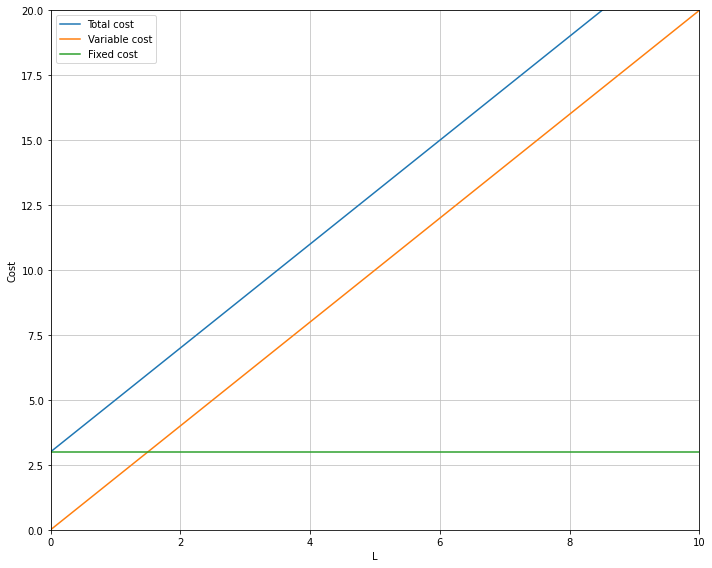

In [29]:
p1 = plot(2*L+3,ylabel='Cost', xlabel='L',label='Total cost',legend=True,xlim=[0,10],ylim=[0,20],show=False)
p2 = plot(2*L,ylabel='Cost', xlabel='L',label='Variable cost',legend=True,show=False)
p3 = plot(3,ylabel='Cost', xlabel='L',label='Fixed cost',legend=True,show=False)
p1.append(p2[0])
p1.append(p3[0])
p1.show()

###### Long term costs

In [30]:
# Lets continue using the same function, but this time, capital is not fixed
Eq(c,2*L+3*k)
# Where L = labor, 𝑘 = capital and c = cost
# For each cost level, the producer can choose any combination
# These combinations are represented by curves called isocosts

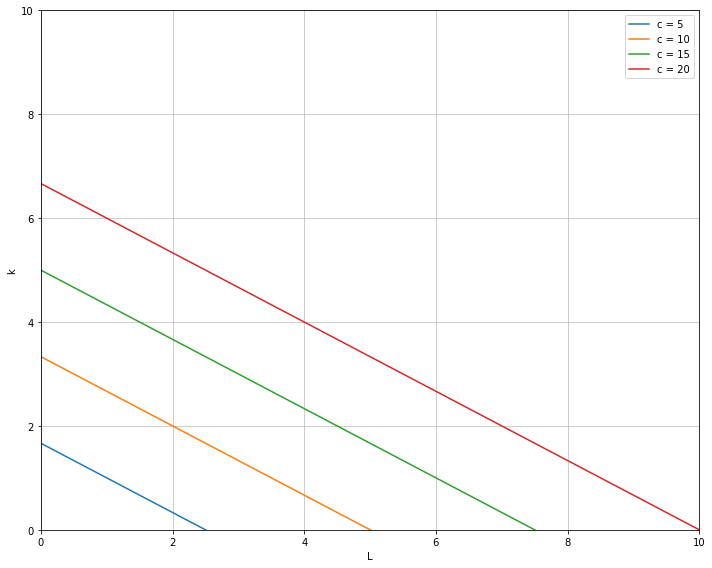

In [31]:
c_ex = 5 # Example production level
p1 = plot_implicit(Eq(c_ex,2*L+3*k), ylabel='k', xlabel='L',label = f'c = {c_ex}',legend=True,xlim=[0,10],ylim=[0,10],show=False)
c_ex = 10 # Example production level
p2 = plot_implicit(Eq(c_ex,2*L+3*k), ylabel='k', xlabel='L',label = f'c = {c_ex}',legend=True,show=False)
c_ex = 15 # Example production level
p3 = plot_implicit(Eq(c_ex,2*L+3*k), ylabel='k', xlabel='L',label = f'c = {c_ex}',legend=True,show=False)
c_ex = 20 # Example production level
p4 = plot_implicit(Eq(c_ex,2*L+3*k), ylabel='k', xlabel='L',label = f'c = {c_ex}',legend=True,show=False)
p1.append(p2[0])
p1.append(p3[0])
p1.append(p4[0])
p1.show()

###### Optimum production level

In [32]:
# Lets say we have the following Cobb-Douglas production function
q = Function('q')(L,k)
Eq(q,2*L**0.5*k**0.5)
# Where L = labor, k = capital and q = quantity produced

In [33]:
# With this function, we can calculate the marginal productivity for each of the factors
Eq(mpl,diff(2*L**0.5*k**0.5,L))
# Marginal productivity of labor

In [34]:
# With this function, we can calculate the marginal productivity for each of the factors
Eq(mpk,diff(2*L**0.5*k**0.5,k))
# Marginal productivity of capital

In [35]:
# Lets say we have the following costs function
Eq(c,2*L + 3*k)
# Where L = labor, k = capital and c = total cost

In [36]:
# Now we can minimize the cost, given the production function
# We get the following function
l = Function('l')(L,k,λ)
Eq(l,2*L + 3*k-λ*(2*L**0.5*k**0.5-qp))
# Where L = labor, k = capital and qp = quantity produced

In [37]:
# Now we get the partial derivatives
# First we get the derivative for labor
diff_1 = diff(2*L + 3*k-λ*(2*L**0.5*k**0.5-qp),L)
diff_1

In [38]:
# Now we get the derivative for capital
diff_2 = diff(2*L + 3*k-λ*(2*L**0.5*k**0.5-qp),k)
diff_2

In [39]:
# Now we get the derivative for λ
diff_3 = diff(2*L + 3*k-λ*(2*L**0.5*k**0.5-qp),λ)
diff_3

In [40]:
# We solve the first equation to λ
sol_1 = solve(diff_1,λ)[0]
sol_1

In [41]:
# We solve the second equation to λ
sol_2 = solve(diff_2,λ)[0]
sol_2

In [42]:
# Now we can equal these two solutions and solve again for one of the variables, in this case L
sol_3 = solve(sol_1 - sol_2,L)[0]
Eq(L,sol_3)
# This means that one unit of labor equals the solution
# This is our expansion path
# Now we know that all combination that respect this condition, are optimal

In [43]:
# Our production function now looks like this
Eq(q,2*(1.5*k**0.5)*(k**0.5))

In [44]:
# Our costs function now looks like this
Eq(c,2*1.5*k + 3*k)

In [45]:
# Example
# Lets say we want our costs to equal 10, we can use this to know how much capital and labor is needed
c_ex = 10
k_ex = solve(2*1.5*k + 3*k - c_ex,k)[0]
k_ex
# This is the capital needed

In [46]:
# Now with our expansion path we can get the labor needed
L_ex = 1.5 * k_ex
L_ex

In [47]:
# This allows us to know how much we can produce with this combination
q_ex = 2*L_ex**0.5*k_ex**0.5
q_ex
# Now we can plot this problem

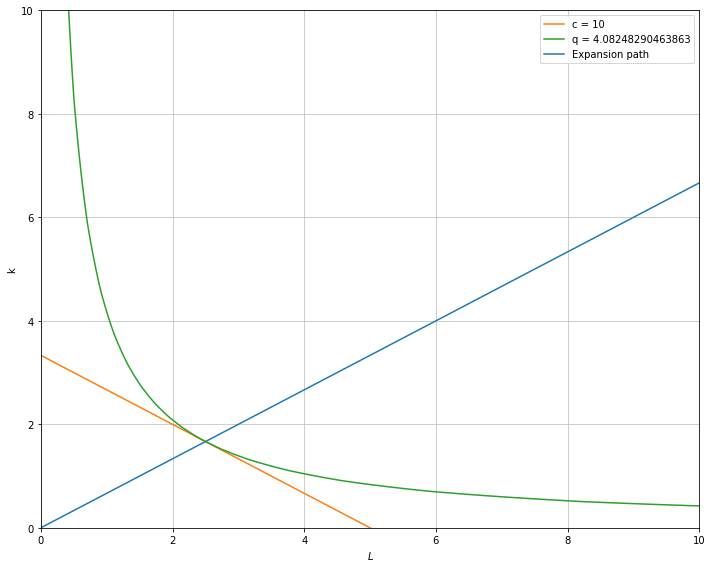

In [48]:
p1 = plot(L/1.5,label = 'Expansion path',ylabel='k',legend=True,xlim=[0,10],ylim=[0,10],show=False)
p2 = plot_implicit(Eq(c_ex,2*L + 3*k),label = f'c = {c_ex}',legend=True,show=False)
p3 = plot_implicit(Eq(q_ex,2*(L**0.5)*(k**0.5)),label = f'q = {q_ex}',legend=True,show=False)
p1.append(p2[0])
p1.append(p3[0])
p1.show()
# As we can see, there is tangency between our isocuant and our isocost exactly where the expansion path curve is

In [49]:
# In this point there is another condition met, which is
Eq(pk/pl,mpk/mpl)
# pk = 3 and pl = 2
# We can check this

In [50]:
diff(2*(L**0.5)*(k**0.5),k)/diff(2*(L**0.5)*(k**0.5),L)

In [51]:
# If we change k and L for the values we got
L_ex/k_ex

In [52]:
# And if we do the same for our relative prices
3/2
# This is another way of knowing if we solved the problem correctly
# We could try with using another cost level or production level as example and we would get the same result
# This result would have different isocosts and isoquants